In [1]:
import numpy
import pylab
import sys
if not './StarSoup' in sys.path:
    sys.path.append('./StarSoup')
import StarSoup
import matplotlib
from matplotlib.ticker import FormatStrFormatter

# Prepare recipes

Fiducial

In [2]:
recipes = {}
recipes['fid'] = StarSoup.fiducial()

Lower common envelope $\alpha \lambda$

In [3]:
recipes['al01'] = StarSoup.fiducial()
recipes['al01']['binary evolution'] = lambda m1,mh,m2,a,e: StarSoup.CommonEnvelope.evolve_common_envelope(m1,mh,m2,a,e,al=0.1)

Natal kick with neutron star momentum

In [4]:
recipes['nkm'] = StarSoup.fiducial()
recipes['nkm']['binary evolution'] = StarSoup.EvolutionSequence.EvolutionSequence(
    [StarSoup.CommonEnvelope.evolve_common_envelope,
    StarSoup.NatalKicks.NatalKicks(StarSoup.NatalKicks.MomentumKick(1e-6*260).calc).evolve]
).evolve

Natal kick with neutron star velocity

In [5]:
recipes['nkv'] = StarSoup.fiducial()
recipes['nkv']['binary evolution'] = StarSoup.EvolutionSequence.EvolutionSequence(
    [StarSoup.CommonEnvelope.evolve_common_envelope,
    StarSoup.NatalKicks.NatalKicks(StarSoup.NatalKicks.VelocityKick(1e-6*260).calc).evolve]
).evolve

# Generate populations

In [6]:
populations = {key:StarSoup.cook(recipes[key], int(1e6)) for key in recipes}

./StarSoup/NatalKicks.py:16: RuntimeWarning: divide by zero encountered in true_divide
  return numpy.tan(t*2*numpy.pi*numpy.sqrt(e)/(1+e)**1.5)/numpy.sqrt(1.0/e-1.0)
./StarSoup/NatalKicks.py:69: RuntimeWarning: invalid value encountered in sqrt
  vi_x = numpy.sqrt(v_init**2-vi_y**2)
./StarSoup/cook.py:37: RuntimeWarning: invalid value encountered in power
  res['terminal period'] = 9.4e7*res['terminal semi major axis']**1.5/numpy.sqrt(total_mass)


# Predictions for gaia

In [7]:
star_number_scale = 5e7/len(populations['fid']['primary mass'])
gaia_masks = {key: StarSoup.whittle_gaia(populations[key]) for key in populations}
{key:star_number_scale*numpy.sum(populations[key]['statistical weight'][gaia_masks[key]]) 
 for key in gaia_masks}

./StarSoup/whittle_gaia.py:11: RuntimeWarning: invalid value encountered in greater
  return population['terminal semi major axis']>roche_radii
./StarSoup/whittle_gaia.py:18: RuntimeWarning: invalid value encountered in less
  return numpy.logical_and(periods<5,periods>0.137)
./StarSoup/whittle_gaia.py:18: RuntimeWarning: invalid value encountered in greater
  return numpy.logical_and(periods<5,periods>0.137)
./StarSoup/whittle_gaia.py:55: RuntimeWarning: invalid value encountered in greater
  return numpy.logical_and(population['black hole mass']>3.0/(1.0-sigma_pomega/opening_angle-sigma_G),
./StarSoup/whittle_gaia.py:56: RuntimeWarning: invalid value encountered in greater
  apoapses>10*sigma_pomega*population['distance from earth']*5e-12)
./StarSoup/whittle_gaia.py:75: RuntimeWarning: invalid value encountered in less
  return population['terminal eccentricity']<0.99
./StarSoup/whittle_gaia.py:79: RuntimeWarning: invalid value encountered in greater
  return population['terminal sem

{'al01': 482.1120113135207,
 'fid': 579.7451718536622,
 'nkm': 351.77228104351485,
 'nkv': 229.52478796436756}

# Predictions for hipparcos

In [8]:
hip_masks = {key: StarSoup.whittle_hipparcos(populations[key]) for key in populations}
{key:star_number_scale*numpy.sum(populations[key]['statistical weight'][hip_masks[key]]) 
 for key in hip_masks}

./StarSoup/whittle_hipparcos.py:11: RuntimeWarning: invalid value encountered in greater
  return population['terminal semi major axis']>roche_radii
./StarSoup/whittle_hipparcos.py:18: RuntimeWarning: invalid value encountered in less
  return numpy.logical_and(periods<5,periods>0.137)
./StarSoup/whittle_hipparcos.py:18: RuntimeWarning: invalid value encountered in greater
  return numpy.logical_and(periods<5,periods>0.137)
./StarSoup/whittle_hipparcos.py:55: RuntimeWarning: invalid value encountered in greater
  return numpy.logical_and(population['black hole mass']>3.0/(1.0-sigma_pomega/opening_angle-sigma_G),
./StarSoup/whittle_hipparcos.py:56: RuntimeWarning: invalid value encountered in greater
  apoapses>10*sigma_pomega*population['distance from earth']*5e-12)
./StarSoup/whittle_hipparcos.py:75: RuntimeWarning: invalid value encountered in less
  return population['terminal eccentricity']<0.99
./StarSoup/whittle_hipparcos.py:79: RuntimeWarning: invalid value encountered in greate

{'al01': 0.5564803423456501,
 'fid': 0.7879762416040711,
 'nkm': 0.8282143124651451,
 'nkv': 1.1622120505051772}

# Figures

## Black hole masses

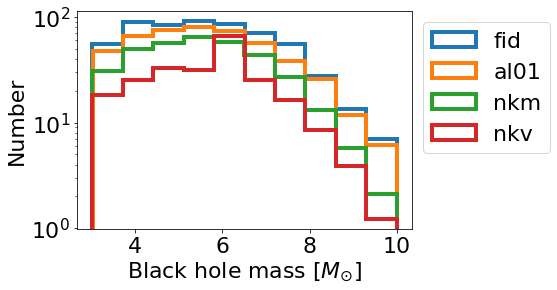

In [9]:
%matplotlib inline
font = {'size':22}
matplotlib.rc('font',**font)
for key in populations:
    pylab.hist(populations[key]['black hole mass'][gaia_masks[key]],
              weights=populations[key]['statistical weight'][gaia_masks[key]]*star_number_scale,
               histtype='step',
               linewidth=4,
              label=key)
pylab.xlabel(r'Black hole mass [$M_{\odot}$]')
pylab.ylabel('Number')
pylab.yscale('log')
pylab.legend(bbox_to_anchor=(1,1))
#pylab.tight_layout()
pass

## Companion masses

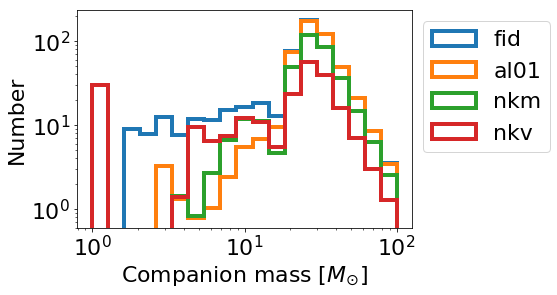

In [17]:
%matplotlib inline
font = {'size':22}
matplotlib.rc('font',**font)
for key in populations:
    pylab.hist(populations[key]['terminal companion mass'][gaia_masks[key]],
              weights=populations[key]['statistical weight'][gaia_masks[key]]*star_number_scale,
               histtype='step',
               linewidth=4,
              label=key,
              bins=numpy.logspace(0,2,20))
pylab.xlabel(r'Companion mass [$M_{\odot}$]')
pylab.ylabel('Number')
pylab.xscale('log')
pylab.yscale('log')
pylab.legend(bbox_to_anchor=(1,1))
#pylab.tight_layout()
pass

## Period

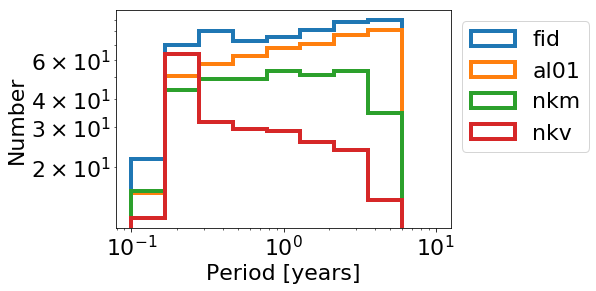

In [21]:
%matplotlib inline
font = {'size':22}
matplotlib.rc('font',**font)
for key in populations:
    pylab.hist(populations[key]['terminal period'][gaia_masks[key]],
              weights=populations[key]['statistical weight'][gaia_masks[key]]*star_number_scale,
               histtype='step',
               linewidth=4,
              label=key,
              bins=numpy.logspace(-1,1,10))
pylab.xlabel(r'Period [years]')
pylab.ylabel('Number')
pylab.xscale('log')
pylab.yscale('log')
#pylab.xticks([0.2,0.5,1,2,4],
#            ['0.2','0.5','1.0','2.0','4.0'])
pylab.legend(bbox_to_anchor=(1,1))
#pylab.tight_layout()
pass

## Distance from earth

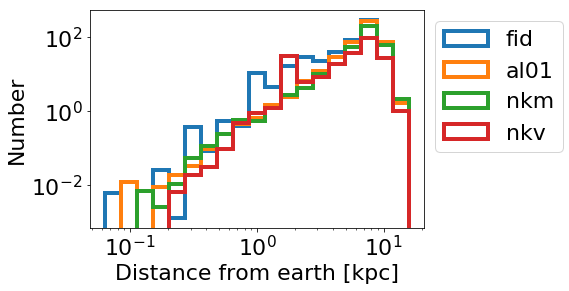

In [28]:
%matplotlib inline
font = {'size':22}
matplotlib.rc('font',**font)
for key in populations:
    pylab.hist(populations[key]['distance from earth'][gaia_masks[key]]/1e3,
              weights=populations[key]['statistical weight'][gaia_masks[key]]*star_number_scale,
               histtype='step',
               linewidth=4,
              label=key,
              bins=numpy.logspace(-1.2,1.2,20))
pylab.xlabel(r'Distance from earth [kpc]')
pylab.ylabel('Number')
pylab.xscale('log')
pylab.yscale('log')
pylab.legend(bbox_to_anchor=(1,1))
#pylab.ylim((1,2e3))
#pylab.tight_layout()
pass

## Apparent magntide

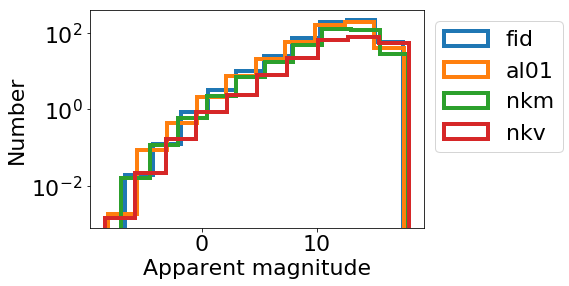

In [29]:
%matplotlib inline
font = {'size':22}
matplotlib.rc('font',**font)
for key in populations:
    pylab.hist(populations[key]['apparent magnitude'][gaia_masks[key]],
              weights=populations[key]['statistical weight'][gaia_masks[key]]*star_number_scale,
               histtype='step',
               linewidth=4,
              label=key)
pylab.xlabel(r'Apparent magnitude')
pylab.ylabel('Number')
pylab.yscale('log')
#pylab.ylim((1,2e3))
#pylab.xlim((-1,20))
pylab.legend(bbox_to_anchor=(1,1))
#pylab.tight_layout()
pass

## Opening angles

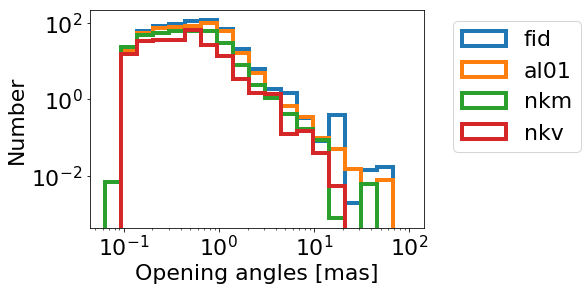

In [32]:
%matplotlib inline
font = {'size':22}
matplotlib.rc('font',**font)
for key in populations:
    sma_list = populations[key]['terminal semi major axis'][gaia_masks[key]]
    dfe_list = populations[key]['distance from earth'][gaia_masks[key]]
    opening_angles = sma_list/dfe_list/5e-9
    pylab.hist(opening_angles,
              weights=populations[key]['statistical weight'][gaia_masks[key]]*star_number_scale,
               histtype='step',
               linewidth=4,
              label=key,
              bins=numpy.logspace(-1.2,2,20))
pylab.xlabel(r'Opening angles [mas]')
pylab.ylabel('Number')
pylab.xscale('log')
pylab.yscale('log')
pylab.legend(bbox_to_anchor=(0,0,1.5,1))
#pylab.xlim((7e-2,1.5e1))
#pylab.ylim((1,1e4))
#pylab.tight_layout()
pass

## Radial velocities

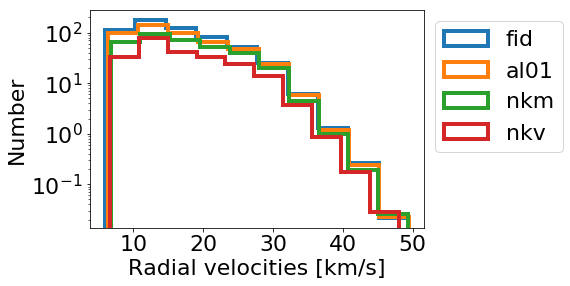

In [38]:
%matplotlib inline
font = {'size':22}
matplotlib.rc('font',**font)
for key in populations:
    period_list = populations[key]['terminal period'][gaia_masks[key]]
    sma_list = populations[key]['terminal semi major axis'][gaia_masks[key]]
    v_list = sma_list/period_list*1e6
    pylab.hist(v_list,
              weights=populations[key]['statistical weight'][gaia_masks[key]]*star_number_scale,
               histtype='step',
               linewidth=4,
              label=key)
pylab.xlabel(r'Radial velocities [km/s]')
pylab.ylabel('Number')
pylab.yscale('log')
#pylab.xscale('log')
#pylab.ylim((1,5e3))
pylab.legend(bbox_to_anchor=(1,1))
#pylab.xticks([5,10,20,50],
#             ['5','10','20','50'])
#pylab.tight_layout()
pass